# AI-ML Final test


## sklearn.datasets.load_digits

### importing libraries

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [12]:

dataset = load_digits()
print(dataset.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 432x288 with 0 Axes>

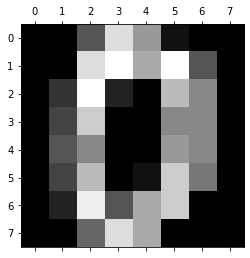

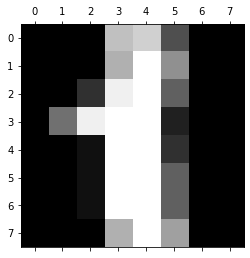

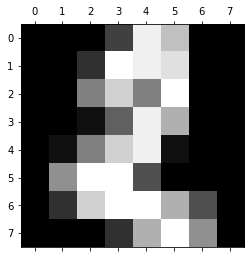

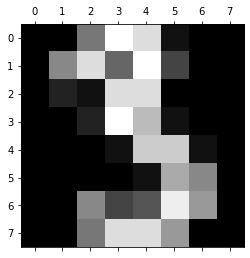

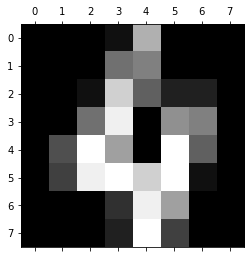

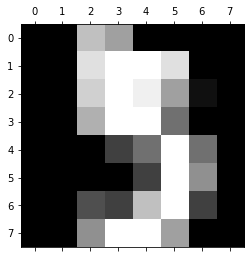

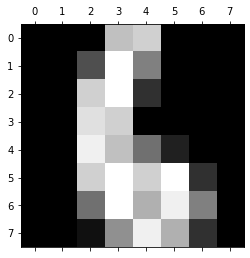

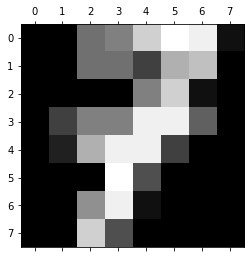

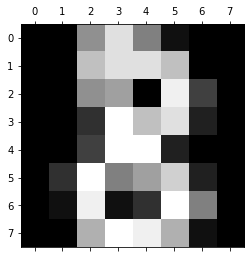

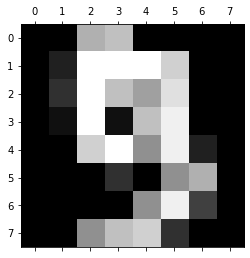

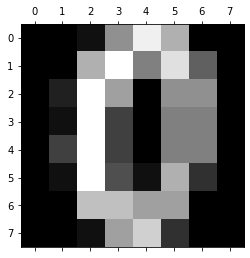

In [19]:
#ploting each image 
plt.gray()
for i in range(11):
    
    plt.matshow(dataset.images[i])

In [31]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

#creating 1 dimensional array out of 2 D array: image
#flatten the images
nlen = len(dataset.images)
data = dataset.images.reshape((nlen, -1))

# Created a model: a support vector classifier
model = svm.SVC(gamma=0.001)

# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    data, dataset.target, test_size=0.8, shuffle=False
)

# training the digits on the train subset
model.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = model.predict(X_test)

In [32]:
print(
    f"model accuracy {model}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

model accuracy SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       140
           1       0.90      0.73      0.80       144
           2       0.86      0.93      0.89       141
           3       0.98      0.76      0.86       145
           4       0.98      0.97      0.97       147
           5       0.96      0.92      0.94       146
           6       0.97      0.96      0.96       145
           7       0.96      0.91      0.94       144
           8       0.84      0.87      0.86       140
           9       0.65      0.91      0.76       146

    accuracy                           0.89      1438
   macro avg       0.91      0.89      0.90      1438
weighted avg       0.91      0.89      0.90      1438




[[139   0   0   0   1   0   0   0   0   0]
 [  0 105  18   0   0   1   4   0  13   3]
 [  0   0 131   2   0   0   0   0   0   8]
 [  0   0   2 110   0   3   0   2   4  24]
 [  0   0   0   0 142   0   0   1   0   4]
 [  0   0   0   0   2 134   1   0   0   9]
 [  2   1   0   0   0   0 139   0   3   0]
 [  0   0   0   0   0   0   0 131   1  12]
 [  0   3   2   0   0   1   0   0 122  12]
 [  0   8   0   0   0   1   0   2   2 133]]


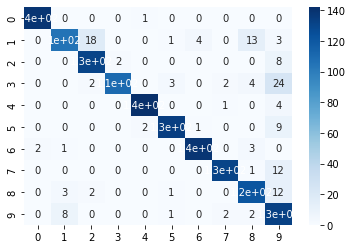

In [35]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test,predicted)

print(cf_matrix)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')